## **THE SPARKS FOUNDATION**
## **TASK1- Prediction using Supervised ML**
## **RASHI AGRAWAL**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### **IMPORTING THE DATASET**
ENTERING DATA FROM REMOTE LINK


In [ ]:
data = pd.read_csv('http://bit.ly/w-data')
print("Data Imported Successfully")
data.head(10)

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### **CHECK THE SIZE OF DATASET**

In [ ]:
data.shape

(25, 2)

### **SUMMARY OF DATASET**

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### **DISPLAYING ALL THE COLUMNS AND THEIR DATA TYPES**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**CHECKING FOR NULL VALUES**

In [ ]:
data.isnull==True

False

Dataset does not have any null value. 

### **DATA VISUALISATION**
Plotting the data points on a 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.We can create the plot with the following script:

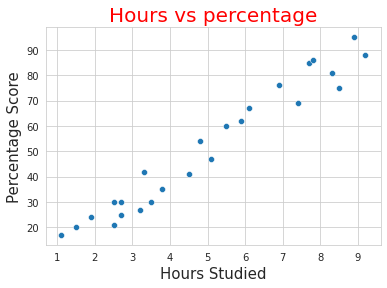

In [ ]:
sns.set_style('whitegrid')
sns.scatterplot(x=data['Hours'],y=data['Scores'])
plt.title('Hours vs percentage', size=20, color='red')
plt.xlabel('Hours Studied', size=15)
plt.ylabel('Percentage Score',size=15)
plt.show()

From the above graph, we can clearly see that there is a positive linear relation between the number of HOURS STUDIED and PERCENTAGE SCORE.

### **REGRESSION LINE**

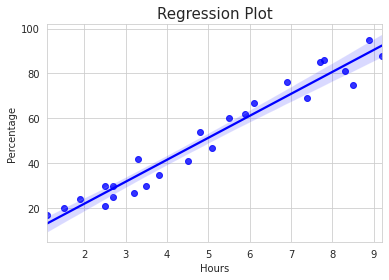

In [ ]:
sns.regplot(x=data['Hours'],y=data['Scores'],color='blue')
plt.title('Regression Plot',size=15)
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

### **CORRELATION BETWEEN THE ATTRIBUTES**

In [ ]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### **DATA PREPARATION**

**Splitting data into input variables and target variables**

In [ ]:
x=data['Hours'].values.reshape(-1,1)
y=data['Scores'].values.reshape(-1,1)

**Splitting the data into Training Set and Data Set**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
print('Training Set x:',x_train.shape)
print('Training Set y:',y_train.shape)
print('Test Set x:',x_test.shape)
print('Test Set x:',x_test.shape)



Training Set x: (20, 1)
Training Set y: (20, 1)
Test Set x: (5, 1)
Test Set x: (5, 1)


### **MODEL DEVELOPMENT**

Here we build a ML model or simple linear regression using sckit learn library and training the model through the given dataset to predict the score of student based on the number of hours of they study.

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
print('coefficient:',regressor.coef_)

coefficient: [[9.91065648]]


### **MAKING PREDICTIONS**

In [ ]:
y_pred=regressor.predict(x_test)
print(y_pred)

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


**COMPAIRING THE PREDICTED VS ACTUAL MARKS IN THE DATASET**

In [ ]:
data = pd.DataFrame({"Hours": x_test.reshape(1,-1)[0], "Actual": y_test.reshape(1,-1)[0],"Predicted":y_pred.reshape(1,-1)[0]})
data

,Hours,Actual,Predicted
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


### **ACCURACY OF MODEL**

In [ ]:
from sklearn import metrics
print("Mean Absolute Error:", 
      metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002982


The Value of Mean Absolute error is small,so there are less possibilities of Errors

### **PREDICTION USING MODEL**

### Q. What will be the predicted score if the student studeis for 9.25Hrs/day?

In [ ]:
Hours=9.25
result = regressor.predict([[Hours]])
print(result)

[[93.69173249]]


### **RESULT-According to the model, if a student studies for 9.25 hours per day, then he/she will score 93.6917%**